In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # this library is for splitting the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import math
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.svm import SVC

## Reading the Data :

In [2]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### There is no missing data.

In [5]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.shape

(253680, 22)

## Exploratory Data Analysis :

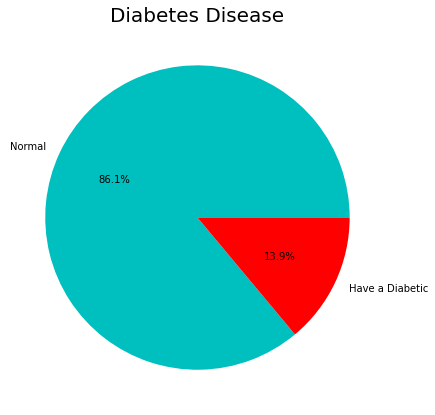

In [7]:
mycolors = ["c","r"]
mylabels = ["Normal", "Have a Diabetic"]
plt.title("Diabetes Disease",color='Black',fontsize = 20)
df.Diabetes_binary.value_counts(sort=False).plot.pie(labels = mylabels, figsize=(7,7), autopct='%1.1f%%', colors = mycolors)
plt.ylabel("", color="black", fontsize = 15);

In [8]:
df.Diabetes_binary[df['Diabetes_binary'] == 0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1] = 'Diabetes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

<ipython-input-8-fa8b6a78aadf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df['Sex'] == 0] = 'Female'


In [9]:
diabetes_sex = df.groupby(['Diabetes_binary', 'Sex']).size().reset_index(name = 'Count')
print(diabetes_sex)

  Diabetes_binary     Sex   Count
0        Diabetes  Female   18411
1        Diabetes    Male   16935
2     No Diabetes  Female  123563
3     No Diabetes    Male   94771


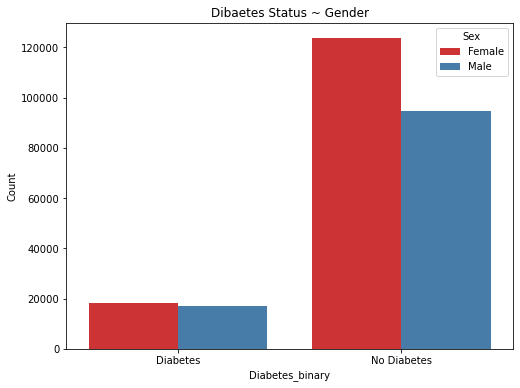

In [10]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Sex', data = diabetes_sex, palette = 'Set1')
plt.title("Dibaetes Status ~ Gender")
plt.show()

### Now we will handle the imbalanced data by Resampling , undersampling mothod 

In [11]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


In [51]:
df.shape

(70692, 22)

Balanced data set has eqully split diabetes samples.


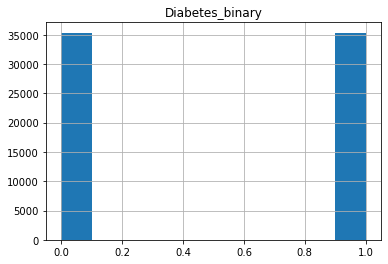

In [12]:
df.hist('Diabetes_binary')
print("Balanced data set has eqully split diabetes samples.")

In [13]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [14]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

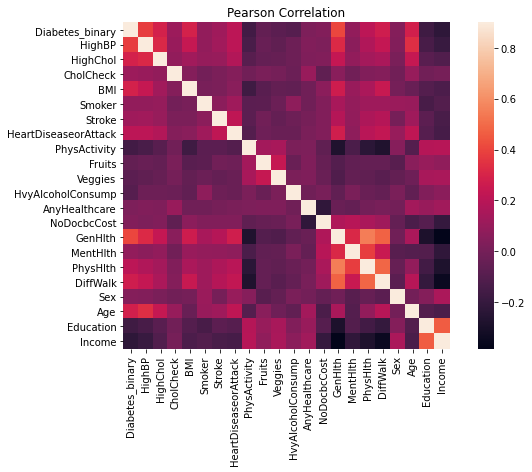

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

## Now we will try different Models of Classification.

In [16]:
# we define 2 list that one of them save results of models other list save name of model
labelList0 = []
resultList0 = []
labelList01 = []
resultList01 = []
labelList2 = []
resultList2 = []

## Separate the data to training and testing 

In [17]:
X = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53019, 21)
(53019,)
(17673, 21)
(17673,)


## 1st Random Forest Classifier

In [30]:
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 7.17 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.740168618797035

In [31]:
y_pred = rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1 0 0 ... 1 0 1]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [32]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.25983138120296495
Root Mean Squared Error : 0.5097365802088025


[[6100 2589]
 [2003 6981]]


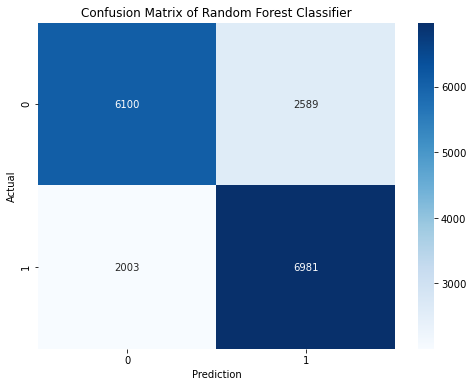

In [33]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
Accuracy = (tp + tn) / (tp + fp + tn + fn)


print(f"Recall: {sensitivity}")
#print(f"specificity: {specificity}")
print(f"Accuracy: {Accuracy}")

Recall: 0.7770480854853072
Accuracy: 0.740168618797035


## 2nd Decision Tree Classifier

In [34]:
Model = DecisionTreeClassifier(max_features=0.2, max_depth=3,random_state=3)

Fitted_Model = Model.fit(X_train, y_train)
y_pred = Fitted_Model.predict(X_test)
Model.score(X_test, y_test)

0.6199287048039382

[[6389 2300]
 [4417 4567]]


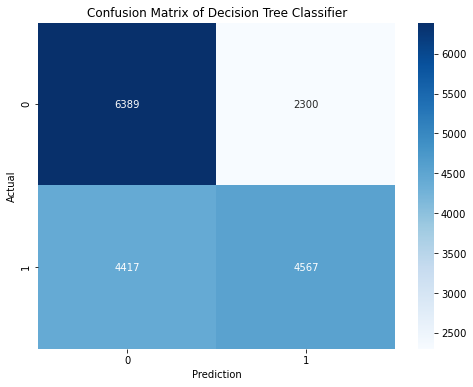

In [35]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [36]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
Accuracy = (tp + tn) / (tp + fp + tn + fn)


print(f"Recall: {sensitivity}")
#print(f"specificity: {specificity}")
print(f"Accuracy: {Accuracy}")

Recall: 0.5083481745325023
Accuracy: 0.6199287048039382


## 3rd Logistic Regression

In [39]:
Model = LogisticRegression(random_state=1, solver='lbfgs',multi_class='multinomial')

Fitted_Model = Model.fit(X_train, y_train)
y_pred = Fitted_Model.predict(X_test)
Model.score(X_test, y_test)

C:\Users\ssq12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7431675437107452

[[6243 2446]
 [2093 6891]]


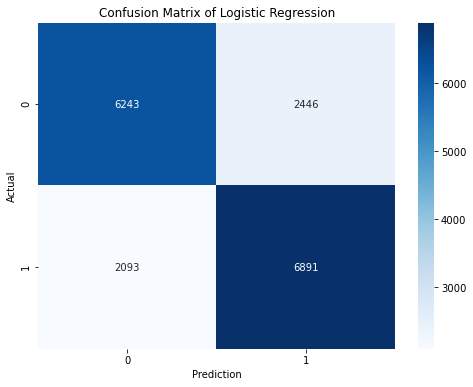

In [40]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [41]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
Accuracy = (tp + tn) / (tp + fp + tn + fn)


print(f"Recall: {sensitivity}")
#print(f"specificity: {specificity}")
print(f"Accuracy: {Accuracy}")

Recall: 0.7670302760463046
Accuracy: 0.7431675437107452


## 4rd KNeighborsClassifier

In [42]:
Model = KNeighborsClassifier(n_neighbors=3)

Fitted_Model = Model.fit(X_train, y_train)
y_pred = Fitted_Model.predict(X_test)
Model.score(X_test, y_test)

0.6918463192440446

[[5902 2787]
 [2659 6325]]


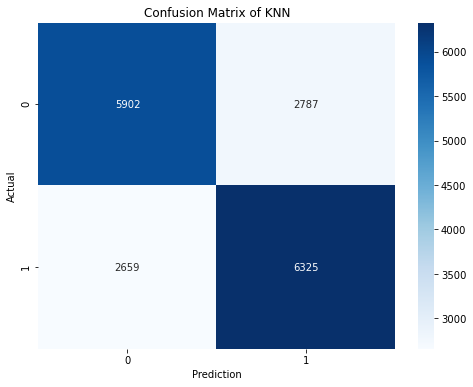

In [44]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix of KNN")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [45]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
Accuracy = (tp + tn) / (tp + fp + tn + fn)


print(f"Recall: {sensitivity}")
#print(f"specificity: {specificity}")
print(f"Accuracy: {Accuracy}")

Recall: 0.7040293855743545
Accuracy: 0.6918463192440446


## 5- XGBClassifier

In [47]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 


C:\Users\ssq12\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ssq12\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.7556724947660273

## 6th Support Vector Machine SVM

In [56]:
svm0 = SVC(random_state=3)
svm0_fit =svm0.fit(X_train,y_train)
y_pred = svm0_fit.predict(X_test)
svm0.score(X_test, y_test)
#print("svm Test score: ",svm0.score(X_test,y_test))


0.7501273128501104

[[5989 2700]
 [1716 7268]]


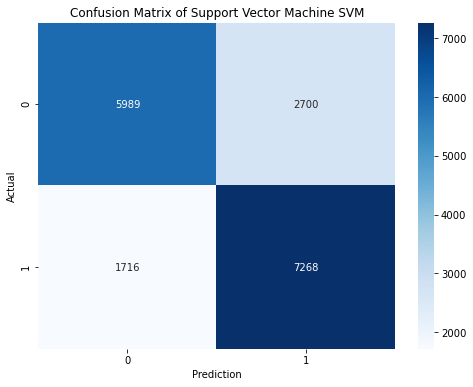

In [61]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Confusion Matrix of Support Vector Machine SVM")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [59]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
Accuracy = (tp + tn) / (tp + fp + tn + fn)


print(f"Recall: {sensitivity}")
#print(f"specificity: {specificity}")
print(f"Accuracy: {Accuracy}")

Recall: 0.808993766696349
Accuracy: 0.7501273128501104


### Check Feature Importance

In [48]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

BMI                     0.170065
Age                     0.125374
GenHlth                 0.111427
Income                  0.082820
HighBP                  0.072091
PhysHlth                0.068241
Education               0.057493
MentHlth                0.051119
HighChol                0.041717
Smoker                  0.028503
Fruits                  0.028490
Sex                     0.026432
DiffWalk                0.025382
PhysActivity            0.023670
Veggies                 0.022241
HeartDiseaseorAttack    0.019297
NoDocbcCost             0.012240
Stroke                  0.010019
HvyAlcoholConsump       0.009777
AnyHealthcare           0.007512
CholCheck               0.006090
dtype: float64


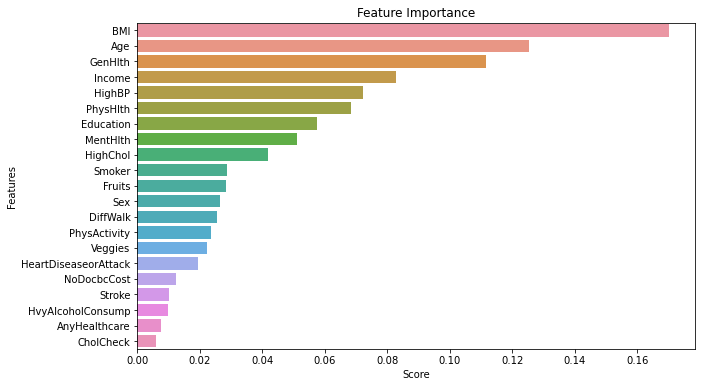

In [49]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [62]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      8689
           1       0.73      0.81      0.77      8984

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673

